In [109]:
%matplotlib inline
import networkx as nx 
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import graphwave
from graphwave.shapes import build_graph
from graphwave.graphwave import *


np.random.seed(123)

In [110]:
import numpy as np 
import pandas as pd

import scanpy as sc
from scipy.sparse import csr_matrix

## Three Dimensions!

In [111]:
m_sm = np.array([0, 0, 0, 1])
m_big = np.array([0,0, 0, -1])

cov_sm = np.array([[10, 0, 0,0], [0,10,0,0], [0,0,10,0], [0, 0,0, .1]])
cov_big = np.array([[10, 0, 0,0], [0,10,0,0], [0,0,10,0], [0, 0,0, .75]])

In [112]:
smN = 100
smB = 1000

In [113]:
smalls = np.random.multivariate_normal(mean = m_sm, cov=cov_sm, size=smN)


In [114]:
bigs = np.random.multivariate_normal(mean= m_big, cov=cov_big, size=smB)

In [115]:
total = np.vstack((smalls, bigs))

In [116]:
labs = ["sm" for i in range(smN)] + ["big" for i in range(smB)]

In [117]:
pancake = pd.DataFrame(total, columns=["noise1", "noise2", "noise3", "marker"])

In [118]:
pancake["label"] = labs

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

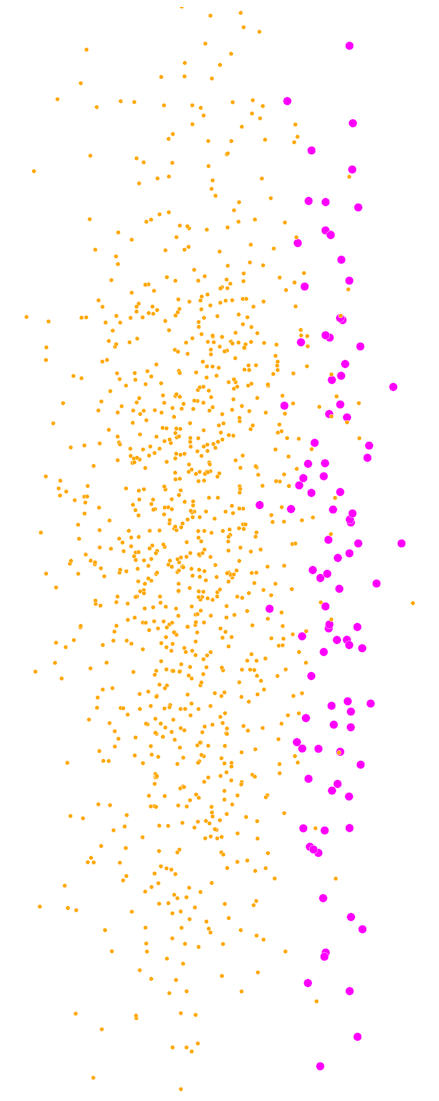

In [120]:
# sns.set(font_scale=1, style="white")

fig, ax = plt.subplots(1,1, figsize=[20,20])

ax.set_aspect("equal")

# ax = f
# 

ax.set_ylim([-7.5,7.5])
sns.scatterplot(y="noise1", x="marker", size="label", size_order=["sm", "big"], hue=pancake["label"].values, 
                palette=["magenta", "orange"], data=pancake, alpha=1, s=80, legend=False)

ax.set_axis_off()
# ax.set_legend(False)
# fig.savefig("figs/pancake_4d.png", bbox_inches="tight", transparent=False)

# fig.savefig("figs/pancake_4d_transp.png", transparent=True, bbox_inches="tight")

<AxesSubplot:xlabel='noise1', ylabel='noise2'>

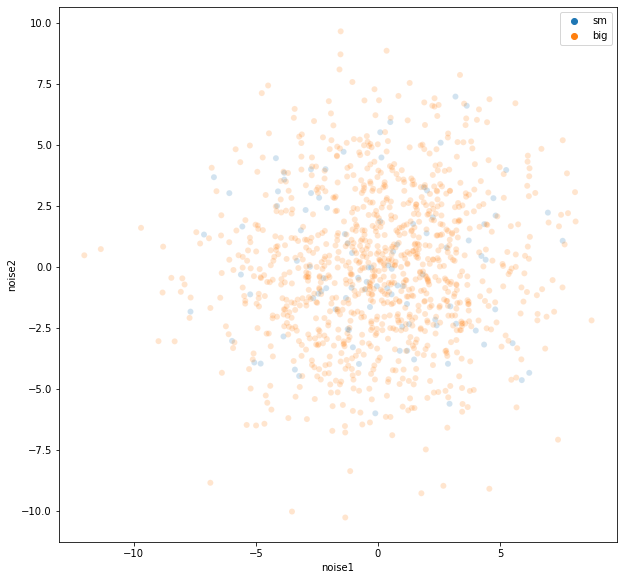

In [121]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

ax.set_aspect("equal")

# ax = f
# 
sns.scatterplot(x="noise1", y="noise2", hue=pancake["label"].values, data=pancake, alpha=.2)

<AxesSubplot:xlabel='marker', ylabel='Count'>

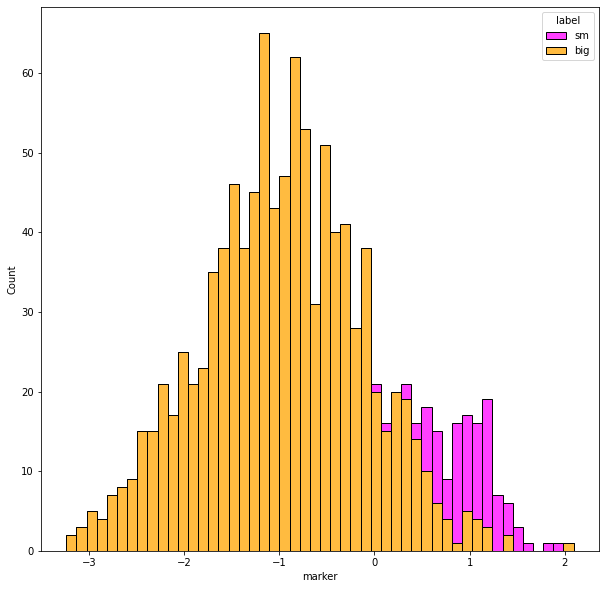

In [122]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

# ax.set_aspect("equal")

# ax = f
# 


sns.histplot(x="marker", hue="label",data=pancake, multiple="stack", bins=50, palette=["magenta", "orange"], ax=ax)

# plt.savefig("figs/hist_4d.png", bbox_inches="tight", transparent=False)

In [123]:
ad = sc.AnnData(total)

In [124]:
ad.obs["label"] = labs

In [125]:
ad

AnnData object with n_obs × n_vars = 1100 × 4
    obs: 'label'

In [126]:
sc.pp.neighbors(ad, n_neighbors=5)

In [127]:
ad

AnnData object with n_obs × n_vars = 1100 × 4
    obs: 'label'
    uns: 'neighbors'
    obsp: 'distances', 'connectivities'

In [128]:
# from scalpel.generators import pancakes
# from scalpel.embed.embedders import PCAEmbedder, GenePCAEmbedder
# from scalpel.eval import plot_umap
# from scalpel.metrics import diff_corr
# sc.tl.umap(ad)

In [129]:
# sc.pl.embedding(ad, basis=)

In [130]:
ad.uns

OverloadedDict, wrapping:
	OrderedDict([('neighbors', {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 5, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean'}})])
With overloaded keys:
	['neighbors'].

In [131]:
# plot_umap(ad, name="test", rerun=True, edges=True, color='label')
sc.pp.neighbors(ad, n_neighbors=15)

In [132]:
ad.obsm

AxisArrays with keys: 

In [133]:
ad

AnnData object with n_obs × n_vars = 1100 × 4
    obs: 'label'
    uns: 'neighbors'
    obsp: 'distances', 'connectivities'

In [134]:
sc.tl.umap(ad, neighbors_key="neighbors")

In [135]:
ad.X

array([[ 0.8948566 , -3.4330654 ,  3.1538832 ,  0.5236678 ],
       [-7.6738334 , -1.8296946 ,  5.222301  ,  0.86436594],
       [-2.1468265 ,  4.003242  , -2.7408738 ,  0.9700504 ],
       ...,
       [-0.5941108 ,  3.1303024 , -0.22258453, -1.6182778 ],
       [-0.38961872,  0.1768099 , -7.341799  , -1.5577391 ],
       [-1.3114679 , -0.5302059 , -4.77741   ,  0.2953588 ]],
      dtype=float32)

In [136]:
ad.obsm["X_umap"]

array([[ 3.5156236,  7.959208 ],
       [ 1.3843468, 10.277837 ],
       [ 7.8410325,  1.4196823],
       ...,
       [ 8.715036 ,  3.990538 ],
       [ 4.2617097,  0.7996333],
       [ 3.3874931,  1.6154178]], dtype=float32)

In [137]:
ad.obsm['X_umap'] = ad.obsm['X_umap']
ad.obsm["X_nat"] = ad.X[:,[0,-1]]

... storing 'label' as categorical


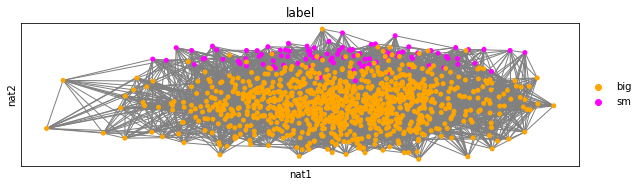

In [138]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

ax.set_aspect("equal")
sc.pl.embedding(ad, basis='nat', edges=True, edges_width=1, size=100, ax=ax, **{"color" : "label", "palette" : ["orange", "magenta"]})

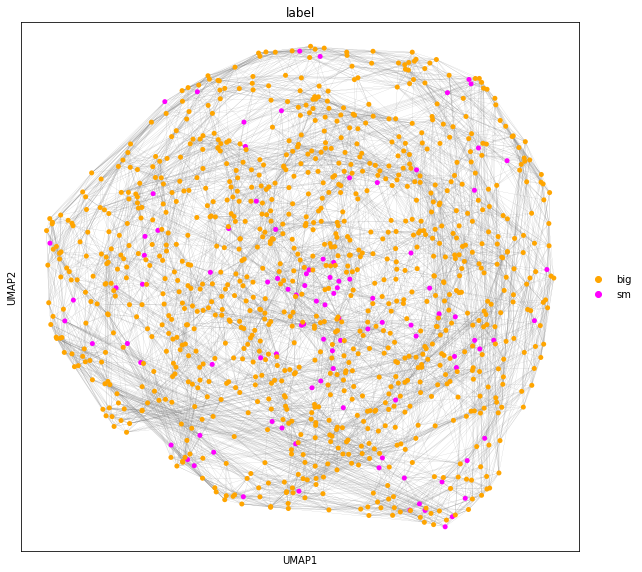

In [139]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

ax.set_aspect("equal")
sc.pl.embedding(ad, basis='umap', edges=True, edges_width=.1, size=100, ax=ax, 
                **{"color" : "label", "palette" : ["orange", "magenta"]})

# plt.savefig("figs/umap_4d.png", bbox_inches="tight", transparent=False)

In [140]:
ad.uns["neighbors"]

OverloadedDict, wrapping:
	{'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'n_neighbors': 15, 'method': 'umap', 'random_state': 0, 'metric': 'euclidean'}}
With overloaded keys:
	['connectivities', 'distances'].

In [141]:
import pygsp

In [142]:
W = ad.obsp["distances"]

In [143]:
G = pygsp.graphs.Graph(W)

In [144]:
G

In [145]:
G.is_connected()

False

In [146]:
G.L

<1100x1100 sparse matrix of type '<class 'numpy.float64'>'
	with 20932 stored elements in Compressed Sparse Column format>

In [147]:
G.compute_fourier_basis()
G.U.shape

(1100, 1100)

In [148]:
G.set_coordinates(ad.X[:,-2:])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


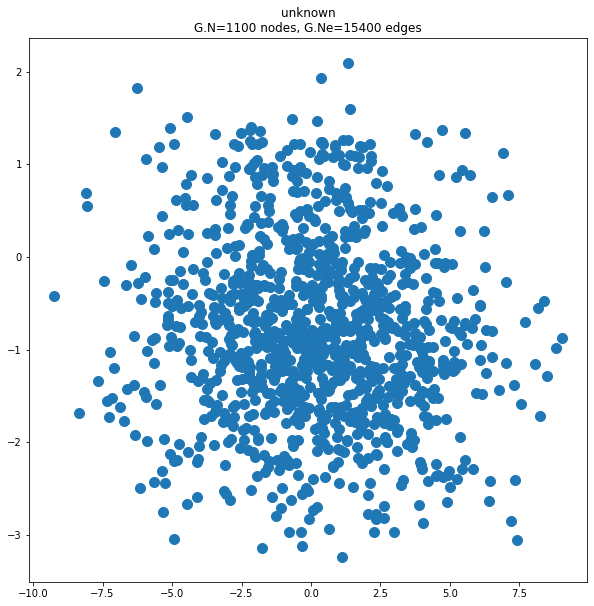

In [149]:
fgi, ax = plt.subplots(1,1, figsize=[10,10])

G.plot(ax=ax,)

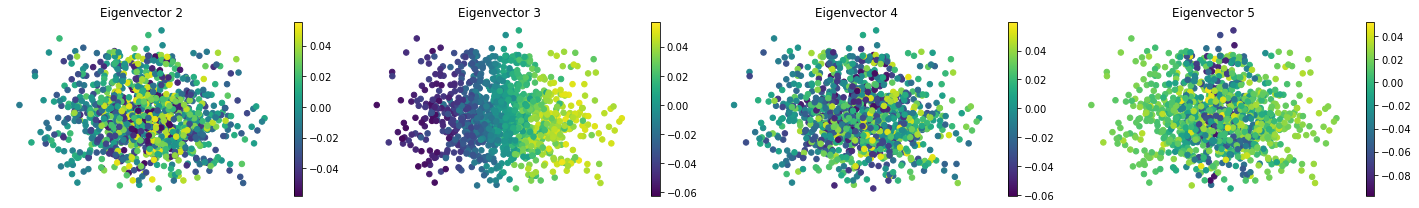

In [150]:
fig, axes = plt.subplots(1, 4, figsize=(20, 3))
for i, ax in enumerate(axes):
    G.plot_signal(G.U[:, i+1], vertex_size=30, ax=ax)
    _ = ax.set_title('Eigenvector {}'.format(i+2))
    ax.set_axis_off()
fig.tight_layout()


In [151]:
g = pygsp.filters.Meyer(G, Nf=10)  # Nf = 6 filters in the filter bank.

In [152]:
DELTA = 0 
# s = G.get_coord
# g.localize(DELTA)

s = G.coords
s = g.filter(s)

In [153]:
s.shape

(1100, 2, 10)

In [154]:
G.coords

array([[ 3.1538832 ,  0.5236678 ],
       [ 5.222301  ,  0.86436594],
       [-2.7408738 ,  0.9700504 ],
       ...,
       [-0.22258453, -1.6182778 ],
       [-7.341799  , -1.5577391 ],
       [-4.77741   ,  0.2953588 ]], dtype=float32)

In [155]:
s.shape

(1100, 2, 10)

In [156]:
ad.X

array([[ 0.8948566 , -3.4330654 ,  3.1538832 ,  0.5236678 ],
       [-7.6738334 , -1.8296946 ,  5.222301  ,  0.86436594],
       [-2.1468265 ,  4.003242  , -2.7408738 ,  0.9700504 ],
       ...,
       [-0.5941108 ,  3.1303024 , -0.22258453, -1.6182778 ],
       [-0.38961872,  0.1768099 , -7.341799  , -1.5577391 ],
       [-1.3114679 , -0.5302059 , -4.77741   ,  0.2953588 ]],
      dtype=float32)

In [157]:
import meld

In [158]:
ad

AnnData object with n_obs × n_vars = 1100 × 4
    obs: 'label'
    uns: 'neighbors', 'umap', 'label_colors'
    obsm: 'X_umap', 'X_nat'
    obsp: 'distances', 'connectivities'

In [159]:
sample_densities = meld.MELD().fit_transform(ad.X, np.array(labs))

Building graph on 1100 samples and 4 features.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.02 seconds.
  Calculating affinities...
Calculated graph and diffusion operator in 0.04 seconds.


In [160]:
sample_densities

,big,sm
0,0.000910,0.000896
1,0.000926,0.000740
2,0.000875,0.001250
3,0.000879,0.001205
4,0.000931,0.000685
...,...,...
1095,0.000901,0.000987
1096,0.000885,0.001145
1097,0.000920,0.000805
1098,0.000900,0.001003


<AxesSubplot:xlabel='noise1', ylabel='marker'>

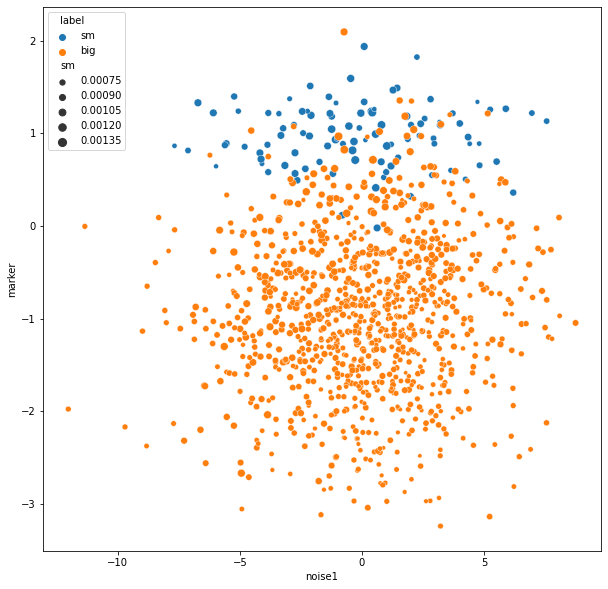

In [161]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue="label", size=sample_densities.sm)

<AxesSubplot:xlabel='noise1', ylabel='noise2'>

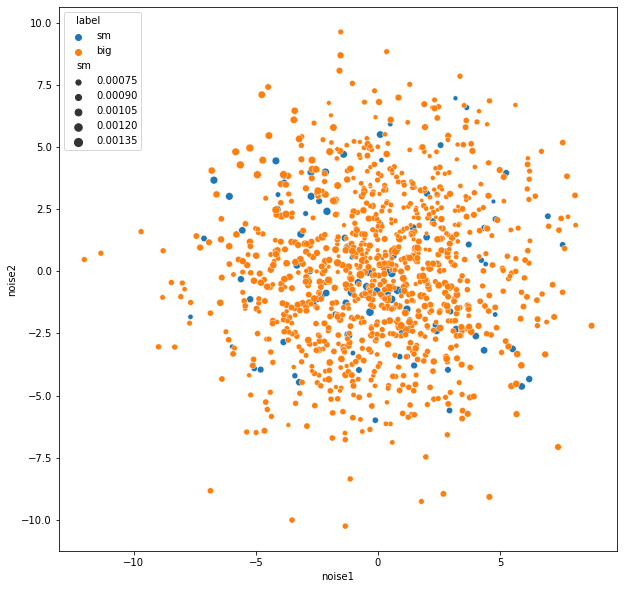

In [162]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="noise2", hue="label", size=sample_densities.sm)

<AxesSubplot:>

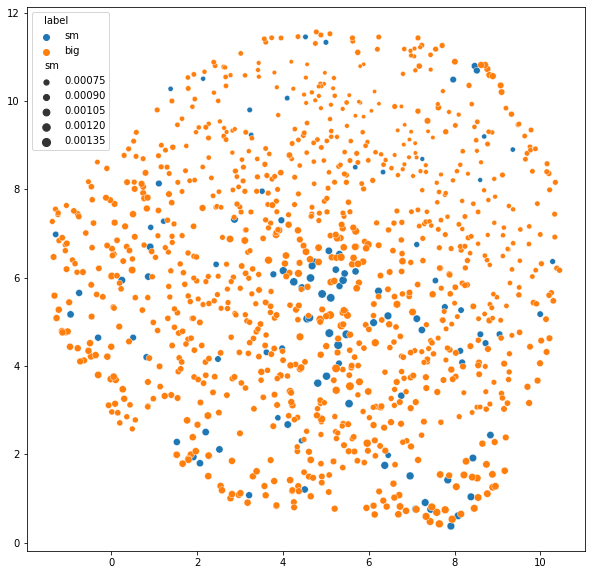

In [163]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x=ad.obsm["X_umap"][:,0], y=ad.obsm["X_umap"][:,1], hue="label", size=sample_densities.sm)

In [164]:
pancake

,noise1,noise2,noise3,marker,label
0,0.894857,-3.433065,3.153883,0.523668,sm
1,-7.673834,-1.829695,5.222301,0.864366,sm
2,-2.146827,4.003242,-2.740874,0.970050,sm
3,-1.403994,4.716188,-2.020386,0.862646,sm
4,3.175097,6.975763,6.915225,1.122123,sm
...,...,...,...,...,...
1095,-3.975552,1.195591,1.040834,-0.607974,big
1096,1.292239,-2.039880,-1.552295,0.376427,big
1097,-0.594111,3.130302,-0.222585,-1.618278,big
1098,-0.389619,0.176810,-7.341799,-1.557739,big


<AxesSubplot:xlabel='noise1', ylabel='marker'>

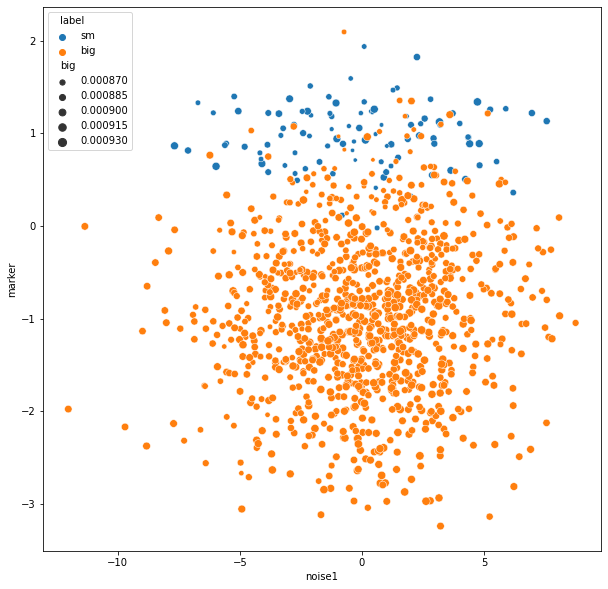

In [165]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue="label", size=sample_densities.big)

<AxesSubplot:xlabel='noise1', ylabel='marker'>

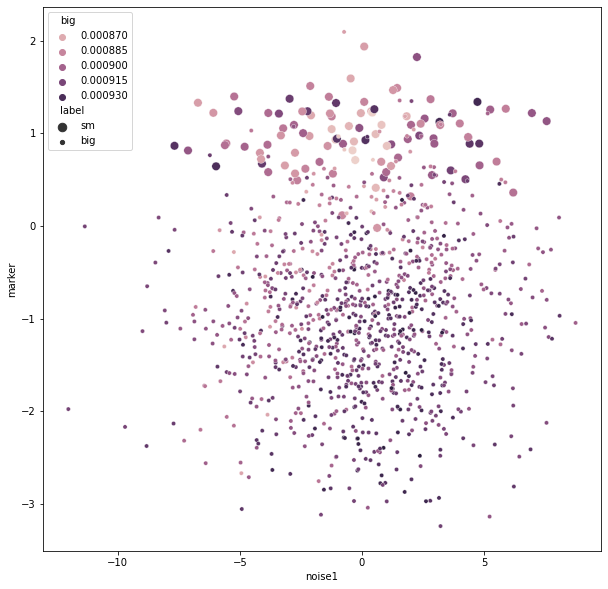

In [166]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue=sample_densities.big, size="label")

In [167]:
g

In [168]:
G

In [169]:
G.coords

array([[ 3.1538832 ,  0.5236678 ],
       [ 5.222301  ,  0.86436594],
       [-2.7408738 ,  0.9700504 ],
       ...,
       [-0.22258453, -1.6182778 ],
       [-7.341799  , -1.5577391 ],
       [-4.77741   ,  0.2953588 ]], dtype=float32)

In [170]:
s = ad.X[:,-1]

In [171]:
s.shape

(1100,)

In [172]:
s = g.filter(s)

In [173]:
s.shape

(1100, 10)

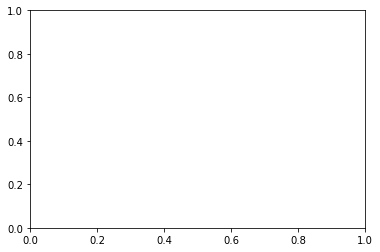

In [174]:
# fig, axes = plt.subplots(1, 4, figsize=(20, 3))
for i, ax in enumerate(axes):
    G.plot_signal(s[:,4+i], vertex_size=30, ax=ax)
    _ = ax.set_title('Eigenvector {}'.format(i+2))
    ax.set_axis_off()
fig.tight_layout()


In [175]:
s

array([[-1.02201887e+00,  2.68537375e-01,  2.27708253e-01, ...,
         1.71176682e+00,  4.07849451e-02, -2.58295250e-02],
       [-1.02136920e+00,  2.69069892e-01,  2.28159806e-01, ...,
         6.94279876e-01,  9.16132211e-01,  8.91282528e-01],
       [-1.02144684e+00,  2.65914860e-01,  2.25484472e-01, ...,
         8.38099488e-01,  7.84783830e-01, -4.76525044e-02],
       ...,
       [-1.01454719e+00,  2.50814041e-01,  2.12679618e-01, ...,
        -9.09472039e-01,  5.86165051e-01, -1.14799235e-03],
       [-1.01842998e+00,  2.55870368e-01,  2.16967169e-01, ...,
        -3.60310085e-01,  8.14966492e-02, -1.27389282e-01],
       [-1.01869882e+00,  2.57155604e-01,  2.18056996e-01, ...,
         1.12674453e+00, -1.92195208e-02, -1.81986987e-01]])

In [176]:
pancake[[f"eigen_{i}" for i in range(s.shape[1])]] = s

In [177]:
pancake

,noise1,noise2,noise3,marker,label,eigen_0,eigen_1,eigen_2,eigen_3,eigen_4,eigen_5,eigen_6,eigen_7,eigen_8,eigen_9
0,0.894857,-3.433065,3.153883,0.523668,sm,-1.022019,0.268537,0.227708,-0.245423,0.085271,-0.138026,-0.120072,1.711767,0.040785,-0.025830
1,-7.673834,-1.829695,5.222301,0.864366,sm,-1.021369,0.269070,0.228160,-0.277747,-0.008868,0.209664,-0.481012,0.694280,0.916132,0.891283
2,-2.146827,4.003242,-2.740874,0.970050,sm,-1.021447,0.265915,0.225484,-0.210617,0.085570,0.064318,0.399916,0.838099,0.784784,-0.047653
3,-1.403994,4.716188,-2.020386,0.862646,sm,-1.020802,0.264569,0.224343,-0.209768,0.079546,0.019333,0.355166,1.727319,0.142433,-0.033261
4,3.175097,6.975763,6.915225,1.122123,sm,-1.026425,0.280713,0.238032,-0.288529,0.003077,-0.112102,-0.029098,0.548769,0.782065,1.038901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-3.975552,1.195591,1.040834,-0.607974,big,-1.015926,0.255384,0.216555,-0.232585,0.007085,0.208932,0.000971,0.073111,0.042221,-0.018012
1096,1.292239,-2.039880,-1.552295,0.376427,big,-1.018888,0.256849,0.217797,-0.152858,0.275846,0.426650,0.193398,0.527174,-0.077307,-0.003532
1097,-0.594111,3.130302,-0.222585,-1.618278,big,-1.014547,0.250814,0.212680,-0.194318,0.030762,-0.251256,-0.327473,-0.909472,0.586165,-0.001148
1098,-0.389619,0.176810,-7.341799,-1.557739,big,-1.018430,0.255870,0.216967,-0.145670,0.186652,-0.264372,-0.466123,-0.360310,0.081497,-0.127389


<AxesSubplot:xlabel='noise1', ylabel='marker'>

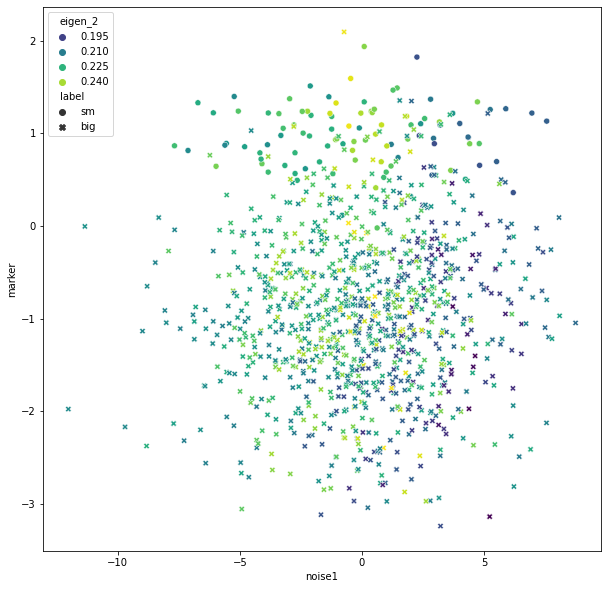

In [178]:
fig, ax = plt.subplots(1,1,figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue="eigen_2", style="label", palette="viridis", ax=ax)

In [179]:
pancake.groupby("label")[pancake.columns[pancake.columns.str.contains("eigen")]].agg(["mean", "std"])

eigen_0             eigen_1             eigen_2             eigen_3  \
           mean       std      mean       std      mean       std      mean   
label                                                                         
big   -1.017883  0.006258  0.257762  0.016708  0.218571  0.014168 -0.201652   
sm    -1.021060  0.005879  0.264919  0.015228  0.224640  0.012912 -0.211934   

                  eigen_4             eigen_5             eigen_6            \
            std      mean       std      mean       std      mean       std   
label                                                                         
big    0.069270  0.101739  0.081439 -0.076696  0.324830 -0.088303  0.430959   
sm     0.058149  0.142653  0.086603  0.399808  0.624967  0.384427  0.376023   

        eigen_7             eigen_8             eigen_9            
           mean       std      mean       std      mean       std  
label                                                              
big   -0.063429  0.540983 -0.044383  0.373446 -0.005148  0.142492  
sm     0.650240  0.715882  0.446543  0.537691  0.051625  0.203931

In [180]:
pancake["sig_norm"] = pancake[[f"eigen_{i}" for i in range(s.shape[1])]].mean(axis="columns")

In [181]:
pancake.groupby("label")["sig_norm"].agg(["mean", "std"])

,mean,std
label,,
big,-0.091942,0.097359
sm,0.133186,0.042634


<AxesSubplot:xlabel='noise1', ylabel='marker'>

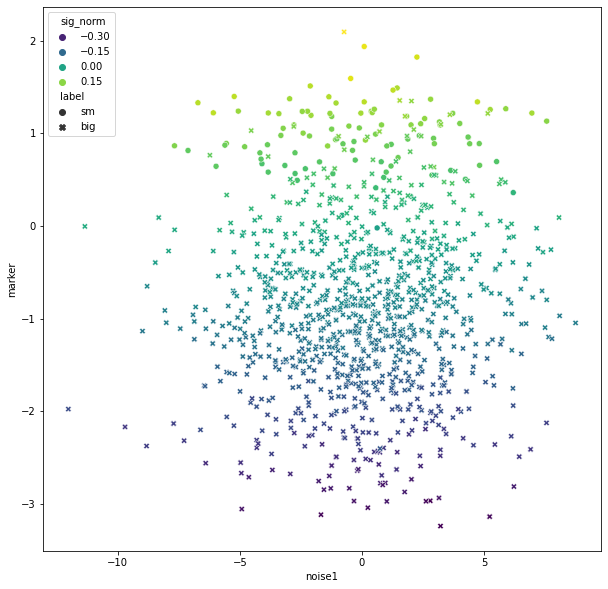

In [182]:
fig, ax = plt.subplots(1,1,figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue="sig_norm", style="label", palette="viridis", ax=ax)

<AxesSubplot:xlabel='noise1', ylabel='noise2'>

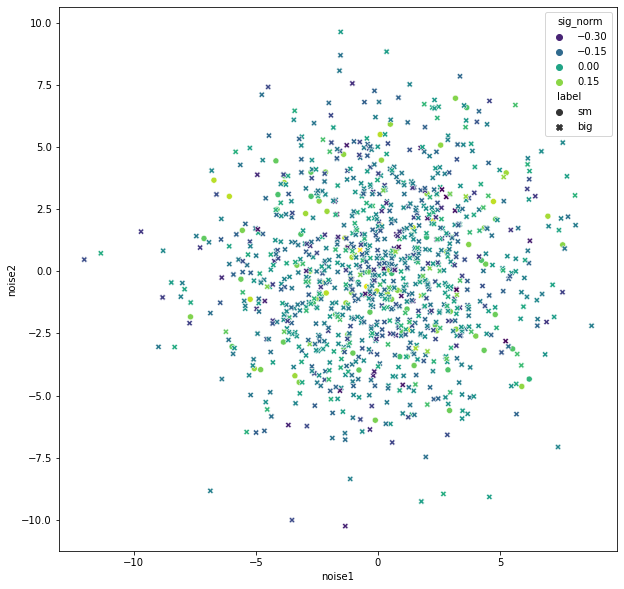

In [183]:
fig, ax = plt.subplots(1,1,figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="noise2", hue="sig_norm", style="label", palette="viridis", ax=ax)

In [184]:
s_n1 = ad.X[:,0]
s_n1 = g.filter(s_n1)

In [185]:
pancake[[f"eigen_noise_{i}" for i in range(s_n1.shape[1])]] = s_n1

In [186]:
pancake["sig_norm_n1"] = pancake[[f"eigen_noise_{i}" for i in range(s.shape[1])]].mean(axis="columns")

In [187]:
pancake.groupby("label")[[f"eigen_noise_{i}" for i in range(s.shape[1])]].agg(["mean", "std"])

eigen_noise_0           eigen_noise_1           eigen_noise_2            \
               mean       std          mean       std          mean       std   
label                                                                           
big        0.015335  0.107164     -0.003774  0.322927     -0.003201  0.273828   
sm         0.015918  0.110034     -0.005216  0.330037     -0.004423  0.279857   

      eigen_noise_3           eigen_noise_4           eigen_noise_5            \
               mean       std          mean       std          mean       std   
label                                                                           
big        0.003228  2.022162     -0.001560  1.627924      0.022428  0.503224   
sm         0.001397  2.006100     -0.001927  1.740752     -0.218732  0.645150   

      eigen_noise_6           eigen_noise_7           eigen_noise_8            \
               mean       std          mean       std          mean       std   
label                                                                           
big       -0.004265  0.617840     -0.001345  0.401427      0.000087  0.330329   
sm         0.050184  0.575993      0.013208  0.439990     -0.000915  0.289899   

      eigen_noise_9            
               mean       std  
label                          
big        0.000545  0.160133  
sm        -0.005448  0.126729

<AxesSubplot:xlabel='noise1', ylabel='marker'>

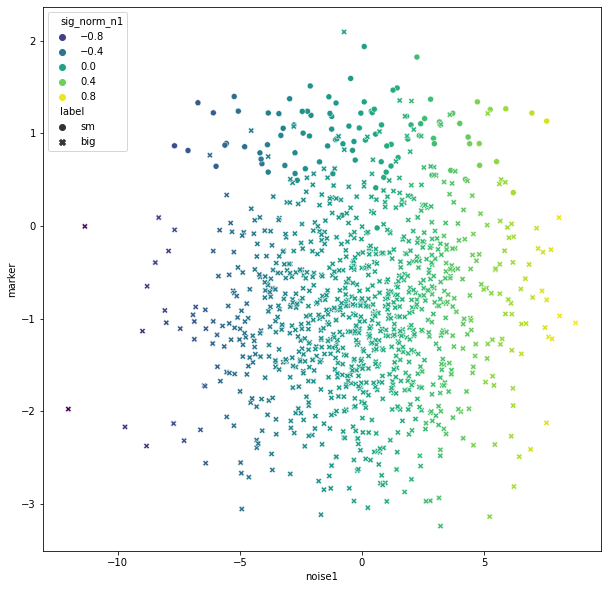

In [188]:
fig, ax = plt.subplots(1,1,figsize=[10,10])

sns.scatterplot(data=pancake, x="noise1", y="marker", hue="sig_norm_n1", style="label", palette="viridis", ax=ax)

In [189]:
pancake.groupby("label")[pancake.columns[pancake.columns.str.contains("sig_norm")]].agg(["mean", "std"])

sig_norm           sig_norm_n1          
           mean       std        mean       std
label                                          
big   -0.091942  0.097359    0.002748  0.279906
sm     0.133186  0.042634   -0.015595  0.301194

In [190]:
nxG = nxG = nx.from_scipy_sparse_matrix(ad.obsp["distances"])

In [191]:
chi, heat_print, taus = graphwave_alg(nxG, np.linspace(0,100,25), taus='auto', verbose=True)

In [192]:
chi.shape

(1100, 100)

In [193]:
heat_print

{0: <1100x1100 sparse matrix of type '<class 'numpy.float64'>'
 	with 733098 stored elements in Compressed Sparse Column format>,
 1: <1100x1100 sparse matrix of type '<class 'numpy.float64'>'
 	with 1196944 stored elements in Compressed Sparse Column format>}

In [194]:
taus

array([1.20293438, 5.23318015])

In [195]:
# nb_clust=len(np.unique(role_id))
pca=PCA(n_components=5)
trans_data=pca.fit_transform(StandardScaler().fit_transform(chi))

In [196]:
pancake[[f"chi_{i}" for i in range(chi.shape[1])]] = chi

In [197]:
pancake[[f"chi_PCA_{i}" for i in range(trans_data.shape[1])]] = trans_data

In [198]:
pancake.groupby("label")[pancake.columns[pancake.columns.str.contains("PCA")]].agg(["mean", "std"])

chi_PCA_0           chi_PCA_1           chi_PCA_2           chi_PCA_3  \
           mean       std      mean       std      mean       std      mean   
label                                                                         
big    0.032725  8.045222 -0.230929  5.148142 -0.149597  2.060872 -0.017849   
sm    -0.327249  6.981310  2.309287  3.730401  1.495965  2.205371  0.178486   

                chi_PCA_4            
            std      mean       std  
label                                
big    1.418246  0.018469  0.612086  
sm     1.549718 -0.184690  0.352264

In [199]:
import umap

In [200]:
um = umap.UMAP(densmap=True, verbose=True).fit_transform(chi)

UMAP(densmap=True, verbose=True)
Construct fuzzy simplicial set
Sat May 22 15:02:59 2021 Finding Nearest Neighbors
Sat May 22 15:02:59 2021 Finished Nearest Neighbor Search
Sat May 22 15:02:59 2021 Construct embedding
Sat May 22 15:02:59 2021 Computing original densities
	completed  0  /  700 epochs
	completed  70  /  700 epochs
	completed  140  /  700 epochs
	completed  210  /  700 epochs
	completed  280  /  700 epochs
	completed  350  /  700 epochs
	completed  420  /  700 epochs
	completed  490  /  700 epochs
	completed  560  /  700 epochs
	completed  630  /  700 epochs
Sat May 22 15:03:04 2021 Finished embedding


In [201]:
pancake[["chi_UMAP_0", "chi_UMAP_1"]] = um

<AxesSubplot:xlabel='chi_UMAP_0', ylabel='chi_UMAP_1'>

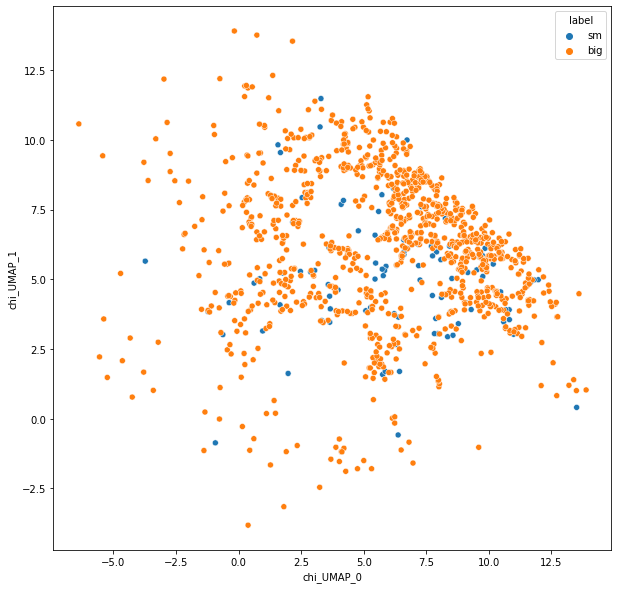

In [202]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="chi_UMAP_0", y="chi_UMAP_1", hue="label")

<AxesSubplot:xlabel='chi_PCA_1', ylabel='chi_PCA_4'>

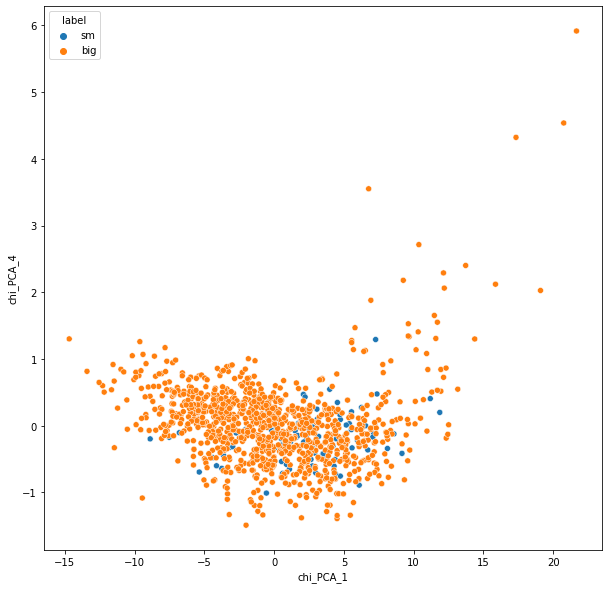

In [203]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="chi_PCA_1", y="chi_PCA_4", hue="label")

In [204]:
pancake.to_csv("../pancake_graphwave.csv")

In [205]:
pwd

'/Users/ashwinnarayan/Documents/MIT/gene_motivated_distances/gene-distances/graphwave'

## Calculate Expectation over Dimensions

In [206]:
heat_print

{0: <1100x1100 sparse matrix of type '<class 'numpy.float64'>'
 	with 733098 stored elements in Compressed Sparse Column format>,
 1: <1100x1100 sparse matrix of type '<class 'numpy.float64'>'
 	with 1196944 stored elements in Compressed Sparse Column format>}

Computation

$\chi^{(\tau)}_{ij}$ is the amount of energy from vertex $i$ to vertex $j$. 

$X^{(j)}_i$ is the expression of gene $j$ in cell $i$. 

In [207]:
expectation = (csr_matrix(total).T)*(heat_print[0])

In [208]:
expT = expectation.T.toarray()

In [209]:
pancake[["noise1_E", "noise2_E", "noise3_E", "marker_E"]] = expT

<AxesSubplot:xlabel='noise2', ylabel='marker'>

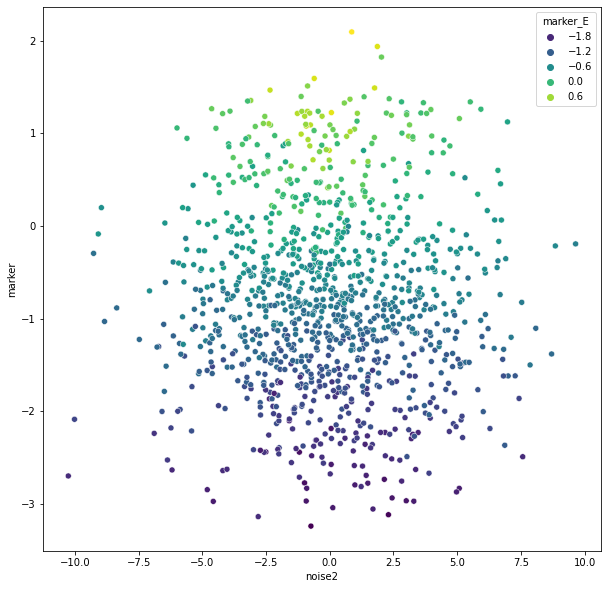

In [210]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(data=pancake, x="noise2", y="marker", hue="marker_E", palette="viridis")

In [211]:
pancake.groupby("label")[pancake.columns[pancake.columns.str.contains("_E")]].agg(["mean", "std"])

noise1_E            noise2_E            noise3_E            marker_E  \
           mean       std      mean       std      mean       std      mean   
label                                                                         
big    0.022641  2.989239 -0.016685  2.920985  0.210008  2.891822 -0.898420   
sm    -0.111958  3.092353  0.052860  2.625385 -0.359226  2.650617  0.237453   

                 
            std  
label            
big    0.518014  
sm     0.310139

In [212]:
pwd

'/Users/ashwinnarayan/Documents/MIT/gene_motivated_distances/gene-distances/graphwave'

In [213]:
time_pnts = np.linspace(0,10,100)

In [214]:
E_dict = {x : np.array(y) for x,y in (pancake[pancake.columns[pancake.columns.str.contains("_E")]].to_dict(orient="list")).items()} 

In [215]:
gene_chi = charac_function_multiscale(E_dict, time_pnts)

AttributeError: 'numpy.ndarray' object has no attribute 'tolil'

In [ ]:
E_dict

In [ ]:
heat_print[0].sum(axis=1)

## Empirical Heatprint

In [229]:
from scipy import sparse

In [217]:
heat_print_d = heat_print[0].toarray()

In [220]:
total.shape

(1100, 4)

In [221]:
heat_print_d.shape

(1100, 1100)

In [223]:
gene_prod_mat = np.array([heat_print_d * total[:,i] for i in range(total.shape[1])])

In [230]:
gene_prod_dict = { i : sparse.csr_matrix(heat_print_d * total[:,i]) for i in range(total.shape[1]) } 

In [224]:
gene_prod_mat.shape

(4, 1100, 1100)

In [231]:
gene_chi = charac_function_multiscale(gene_prod_dict, time_pnts)

In [232]:
gene_chi

array([[ 1.        ,  0.        ,  0.99999959, ...,  0.00377127,
         0.99888119,  0.00379936],
       [ 1.        ,  0.        ,  0.99996744, ...,  0.00595604,
         0.9976515 ,  0.00598859],
       [ 1.        ,  0.        ,  0.99999765, ...,  0.00540986,
         0.99768759,  0.00543528],
       ...,
       [ 1.        ,  0.        ,  0.99999982, ..., -0.00956396,
         0.99804147, -0.00968285],
       [ 1.        ,  0.        ,  0.99999992, ..., -0.00834274,
         0.99771887, -0.00844048],
       [ 1.        ,  0.        ,  0.99999912, ...,  0.00257079,
         0.9995886 ,  0.00259478]])

In [233]:
gene_chi.shape

(1100, 800)

In [234]:
gene_chi_1 = charac_function_multiscale({ "marker" : gene_prod_dict[3]}, time_pnts)

In [247]:
gene_chi_n1 = charac_function_multiscale({ "noise1" : gene_prod_dict[0]}, time_pnts)

In [235]:
gene_chi_1

array([[ 1.        ,  0.        ,  0.99999986, ...,  0.00377127,
         0.99888119,  0.00379936],
       [ 1.        ,  0.        ,  0.99999959, ...,  0.00595604,
         0.9976515 ,  0.00598859],
       [ 1.        ,  0.        ,  0.99999952, ...,  0.00540986,
         0.99768759,  0.00543528],
       ...,
       [ 1.        ,  0.        ,  0.99999866, ..., -0.00956396,
         0.99804147, -0.00968285],
       [ 1.        ,  0.        ,  0.99999872, ..., -0.00834274,
         0.99771887, -0.00844048],
       [ 1.        ,  0.        ,  0.99999996, ...,  0.00257079,
         0.9995886 ,  0.00259478]])

In [236]:
umap_chi = umap.UMAP().fit_transform(gene_chi_1)

In [248]:
umap_chi_n1 = umap.UMAP().fit_transform(gene_chi_n1)

In [244]:
umap_chi_sc = umap.UMAP().fit_transform(gene_chi)

In [239]:
umap_chi

array([[-1.0147985,  9.07241  ],
       [-2.1544425, 14.2009535],
       [-2.1121013, 13.751963 ],
       ...,
       [10.435066 , 14.104833 ],
       [10.205114 , 11.509826 ],
       [-2.6807947,  5.052174 ]], dtype=float32)

In [245]:
pancake[["umap_chi_sc_x", "umap_chi_sc_y"]] = umap_chi_sc

In [245]:
pancake[["umap_chi_x", "umap_chi_y"]] = umap_chi

In [249]:
pancake[["umap_chi_n1_x", "umap_chi_n1_y"]] = umap_chi_n1

<AxesSubplot:xlabel='umap_chi_x', ylabel='umap_chi_y'>

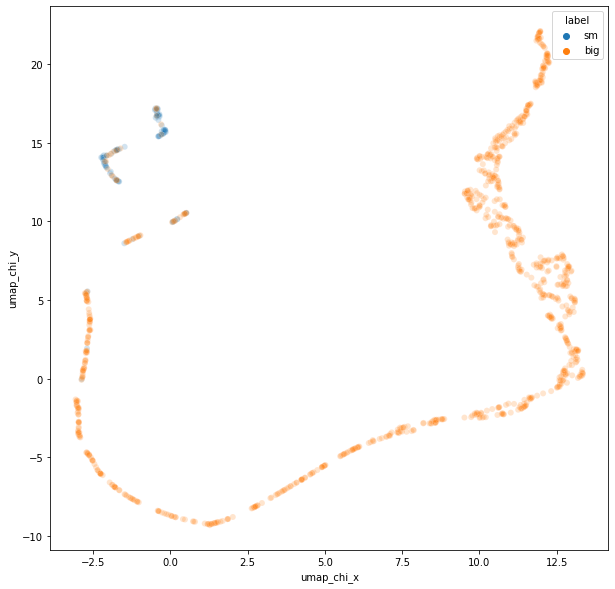

In [243]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(ax=ax, x="umap_chi_x", y="umap_chi_y", data=pancake, hue="label", alpha=.2)

<AxesSubplot:xlabel='umap_chi_sc_x', ylabel='umap_chi_sc_y'>

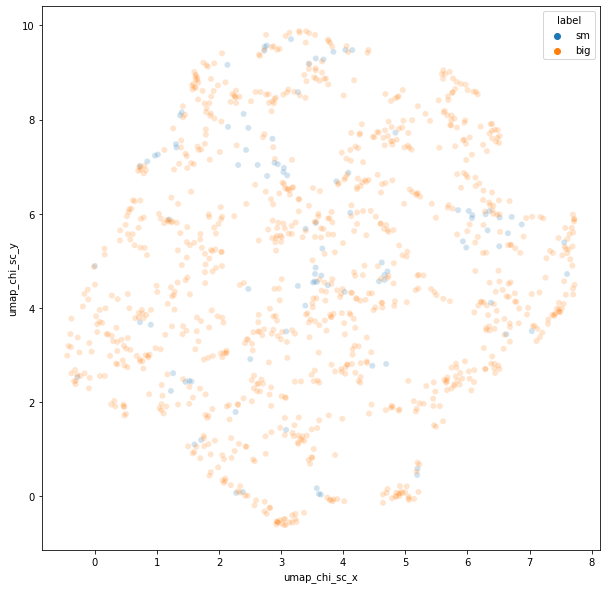

In [246]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(ax=ax, x="umap_chi_sc_x", y="umap_chi_sc_y", data=pancake, hue="label", alpha=.2)

<AxesSubplot:xlabel='umap_chi_n1_x', ylabel='umap_chi_n1_y'>

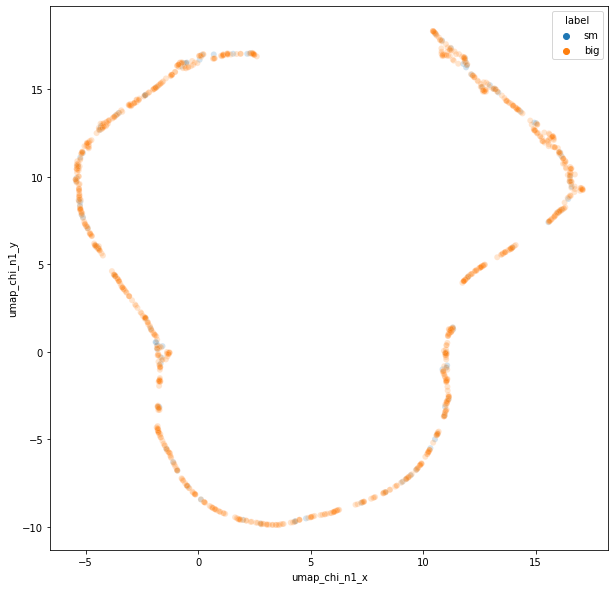

In [251]:
fig, ax = plt.subplots(1,1, figsize=[10,10])

sns.scatterplot(ax=ax, x="umap_chi_n1_x", y="umap_chi_n1_y", data=pancake, hue="label", alpha=.2)